Use seaborn.load_dataset https://seaborn.pydata.org/generated/seaborn.load_dataset.html to load the mpg (miles per gallon, a measure of fuel economy) data. 
Create a visual showing the relationship between horsepower and fuel economy.
Create a table summarizing fuel economy by country of origin
Create a visual showing how fuel economy has changed over time
Create two other visuals or tables related to fuel economy.
Add comments to your notebook with your observations.
Save the notebook
Create a public repository on github https://github.com/new
Upload the file to github


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df=sns.load_dataset('mpg')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


This adds a new column to our table called "efficiency_score" which calculates how efficiency each car's mpg is depending on their horsepower.

In [4]:
df['efficiency_score'] = 100 * (df['mpg'] / df['horsepower'])
df[['name', 'efficiency_score', 'mpg', 'horsepower']].sort_values(by='efficiency_score', ascending=False).head(10)

,name,efficiency_score,mpg,horsepower
325,vw rabbit c (diesel),92.291667,44.3,48.0
326,vw dasher (diesel),90.416667,43.4,48.0
244,volkswagen rabbit custom diesel,89.791667,43.1,48.0
394,vw pickup,84.615385,44.0,52.0
322,mazda glc,71.692308,46.6,65.0
343,toyota starlet,67.413793,39.1,58.0
329,honda civic 1500 gl,66.567164,44.6,67.0
310,toyota corolla tercel,63.500000,38.1,60.0
246,mazda glc deluxe,63.076923,32.8,52.0
324,datsun 210,62.769231,40.8,65.0


This is the relationship between horsepower and fuel economy. Higher horsepower is a lower fuel economy. You get better mpg with a lower horsepower.

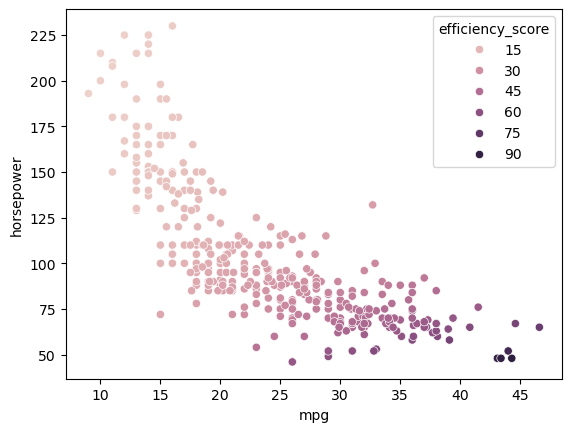

In [5]:
sns.scatterplot(data=df, x='mpg', y='horsepower', hue='efficiency_score')
plt.show()

This is the top 10 cars with the best fuel efficiency by country of origin


In [38]:
df[['name', 'efficiency_score', 'mpg', 'horsepower', 'origin']].sort_values(by='efficiency_score', ascending=False).head(10)

,name,efficiency_score,mpg,horsepower,origin
325,vw rabbit c (diesel),92.291667,44.3,48.0,europe
326,vw dasher (diesel),90.416667,43.4,48.0,europe
244,volkswagen rabbit custom diesel,89.791667,43.1,48.0,europe
394,vw pickup,84.615385,44.0,52.0,europe
322,mazda glc,71.692308,46.6,65.0,japan
343,toyota starlet,67.413793,39.1,58.0,japan
329,honda civic 1500 gl,66.567164,44.6,67.0,japan
310,toyota corolla tercel,63.500000,38.1,60.0,japan
246,mazda glc deluxe,63.076923,32.8,52.0,japan
324,datsun 210,62.769231,40.8,65.0,japan


This table is showing how fuel economy has changed over time

In [7]:
fuelOverTime = df.groupby(['model_year']).agg({'mpg':'mean', 'efficiency_score':'mean'}).sort_values(by='model_year',ascending=False)
fuelOverTime

,mpg,efficiency_score
model_year,,
82,31.709677,41.205606
81,30.334483,40.049260
80,33.696552,47.172841
79,25.093103,28.308305
78,24.061111,28.376385
77,23.375000,26.537136
76,21.573529,25.213628
75,20.266667,22.267754
74,22.703704,28.267576


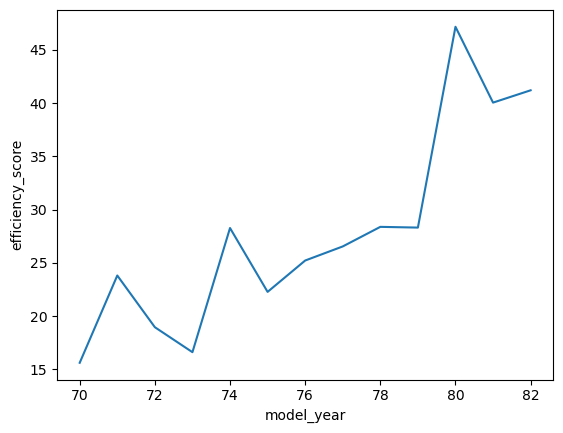

In [8]:
sns.lineplot(data=fuelOverTime, x='model_year', y='efficiency_score')
plt.show()

This shows us the relationship between mpg and weight. As weight increases our mpg decreases resulting in a lower fuel efficiency.


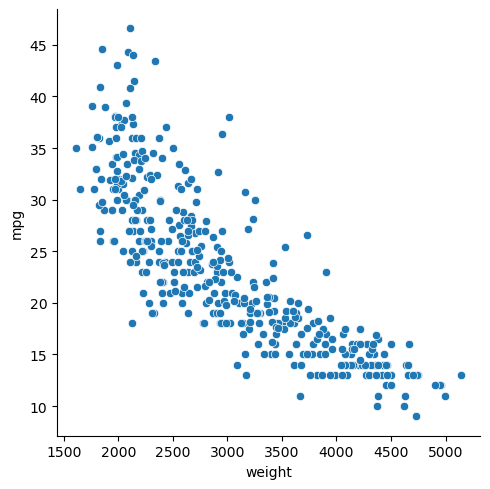

In [ ]:
sns.relplot(data=df, x='weight', y='mpg')
plt.show()

This is showing the average acceleration in the cars from specific origins. This is significant to see that Europe has the best acceleration on average, because in our example a few cells ago we noted that Europe has the top 4 cars with the best fuel efficiency. 

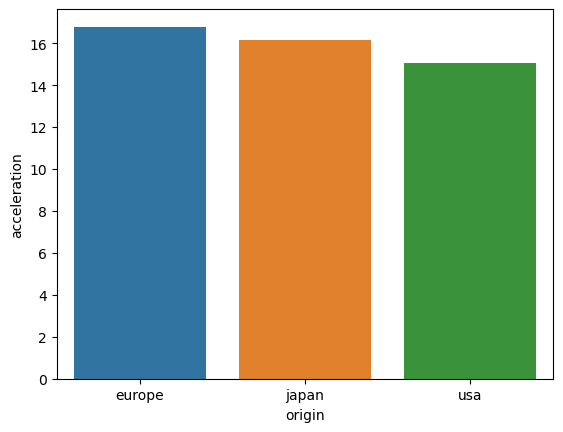

In [36]:
df[['acceleration', 'origin']].sort_values(by='acceleration', ascending=False).head(20)
averageAcceleration = df.groupby('origin')['acceleration'].mean().reset_index()
sns.barplot(data = averageAcceleration, x = 'origin', y = 'acceleration', hue='origin')
plt.show()